# Preparing Data for Machine Learning Challenge

### Task 1.1 : Import Required Liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Task 1.2 : Import Data From Data Source

In [2]:
df=pd.read_csv(r'C:\Users\Admin\Desktop\Machine Learning\Repository\DS2_C6_S1_Insurance_Data_Challenge.csv') #importing data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Task 2.1 Check Structure of Data

In [3]:
#finding rows and columns in dataframe
df.shape  

(1338, 7)

In [4]:
#checking structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#findings columns
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Task 2.2 : Summarize the Data

In [6]:
#summarizing data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### Task 3.1 : Check if there any missing value exists in any feature, identify those features

In [7]:
#finding missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# No any missing value

### Task 3.2 : Perform missing value treatment for categorical and numerical features if any require

### Task 4.1 : Convert Non-Numeric Labeled Columns into Categorical Type

In [9]:
def cat(x):
    cat=[]
    for i in df.columns:
        if x[i].nunique('int64')<10:
            cat.append(i)
    return cat

In [10]:
cat(df)

['sex', 'children', 'smoker', 'region']

In [11]:
df['sex']=df['sex'].astype('object')
df['children']=df['children'].astype('object')
df['smoker']=df['smoker'].astype('object')
df['region']=df['region'].astype('object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   object 
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 73.3+ KB


### Task 4.2 : Use Label Encoder Technique to Convert Categorical Columns Numerical Type

In [13]:
cat_col=df.select_dtypes('object').columns
print(cat_col)

lbl_end=preprocessing.LabelEncoder()

for i in cat_col:
    df[i]=lbl_end.fit_transform(df[i])

Index(['sex', 'children', 'smoker', 'region'], dtype='object')


### Task 4.3 : Perform the Data Scaling

In [14]:
#data scaling

def feature_scaling(scale):
    if scale=='minmax':
        scalar=preprocessing.MinMaxScaler()
    else:
        scalar=preprocessing.StandardScaler()
    df_scale=pd.DataFrame(scalar.fit_transform(df),columns=df.columns)
    return df_scale

final_df=feature_scaling('minmax')
final_df.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.0,1.0,1.000000,0.251611
1,0.000000,1.0,0.479150,0.2,0.0,0.666667,0.009636
2,0.217391,1.0,0.458434,0.6,0.0,0.666667,0.053115
3,0.326087,1.0,0.181464,0.0,0.0,0.333333,0.333010
4,0.304348,1.0,0.347592,0.0,0.0,0.333333,0.043816


### Task 4.4 : Select best features based on their correlation values

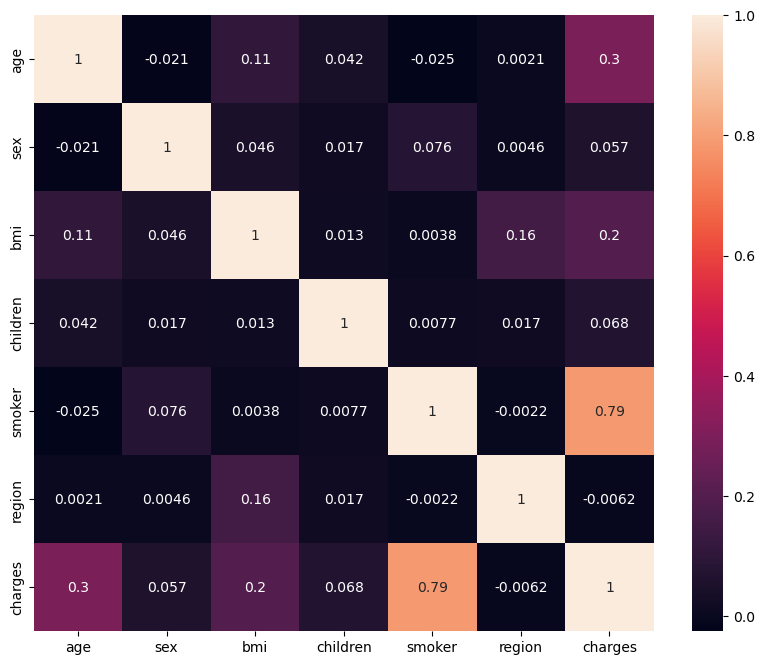

In [15]:
plt.figure(figsize=(10,8))
sb.heatmap(final_df.corr(),annot=True);

In [16]:
#age , bmi and smoker have high correlation with insurance charges

### Task 5.1 : Split the data into train set and test set into 70:30 ratio by row index

In [17]:
#Splitting the data into train set and test set into 70:30 ratio by row index

print("No of rows : ",final_df.shape[0])
n=int(df.shape[0]*0.7)
print("n : ",n)

X_train=final_df.iloc[:n,:]    
print("Training dataset size : ",X_train.shape)

X_test=final_df.iloc[n+1:,:]
print("Test dataset size : ",X_test.shape)

No of rows :  1338
n :  936
Training dataset size :  (936, 7)
Test dataset size :  (401, 7)


### Task 5.2 : Split the data into train set and test set into 70:30 ratio by train_test_split() built in function

In [18]:
final_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [19]:
X=final_df[['age','bmi','smoker']]
y=final_df["charges"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [20]:
X_train

,age,bmi,smoker
966,0.717391,0.237692,1.0
522,0.717391,0.483051,0.0
155,0.565217,0.633844,0.0
671,0.239130,0.408932,0.0
1173,0.434783,0.357815,0.0
...,...,...,...
802,0.065217,0.170568,0.0
53,0.391304,0.496906,1.0
350,0.847826,0.194243,0.0
79,0.500000,0.457493,0.0


In [21]:
X_test

,age,bmi,smoker
12,0.108696,0.496099,0.0
306,0.217391,0.310465,0.0
318,0.565217,0.314366,0.0
815,0.043478,0.417003,0.0
157,0.000000,0.247915,1.0
...,...,...,...
710,0.000000,0.517622,0.0
1005,0.239130,0.424267,0.0
389,0.130435,0.383374,0.0
923,0.347826,0.534167,0.0


In [22]:
y_train

966     0.364661
522     0.139579
155     0.093008
671     0.045040
1173    0.085173
          ...   
802     0.015662
53      0.584542
350     0.170933
79      0.086980
792     0.025700
Name: charges, Length: 936, dtype: float64

In [23]:
y_test

12      0.011253
306     0.304170
318     0.100550
815     0.012068
157     0.229795
          ...   
710     0.009668
1005    0.052859
389     0.055807
923     0.051055
1164    0.096278
Name: charges, Length: 402, dtype: float64

### Task 6 : Perform all data visualization to present insights from the data

In [24]:
df=pd.read_csv(r'C:\Users\Admin\Desktop\Machine Learning\Repository\DS2_C6_S1_Insurance_Data_Challenge.csv')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [26]:
df['bmi']

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

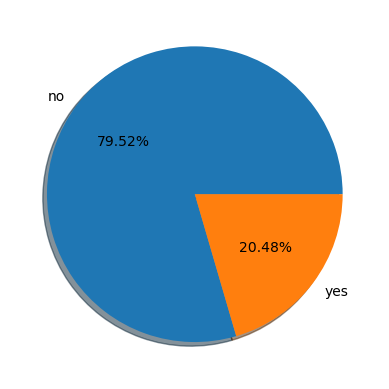

In [27]:
percentage=df["smoker"].value_counts()  
labels=list(df["smoker"].value_counts().index)
plt.pie(percentage,labels = labels, autopct= "%0.2f%%",shadow=True);

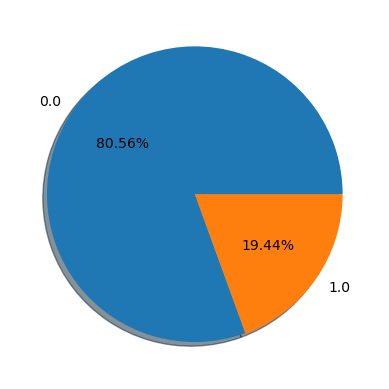

In [28]:
percentage=X_train["smoker"].value_counts()  
labels=list(X_train["smoker"].value_counts().index)
plt.pie(percentage,labels = labels, autopct= "%0.2f%%",shadow=True);

In [ ]:
# Approx 80% of applicants are non-smokers and 20% are smokers. This ratio is same for training data also. Thus training data correctly represents populatio data.

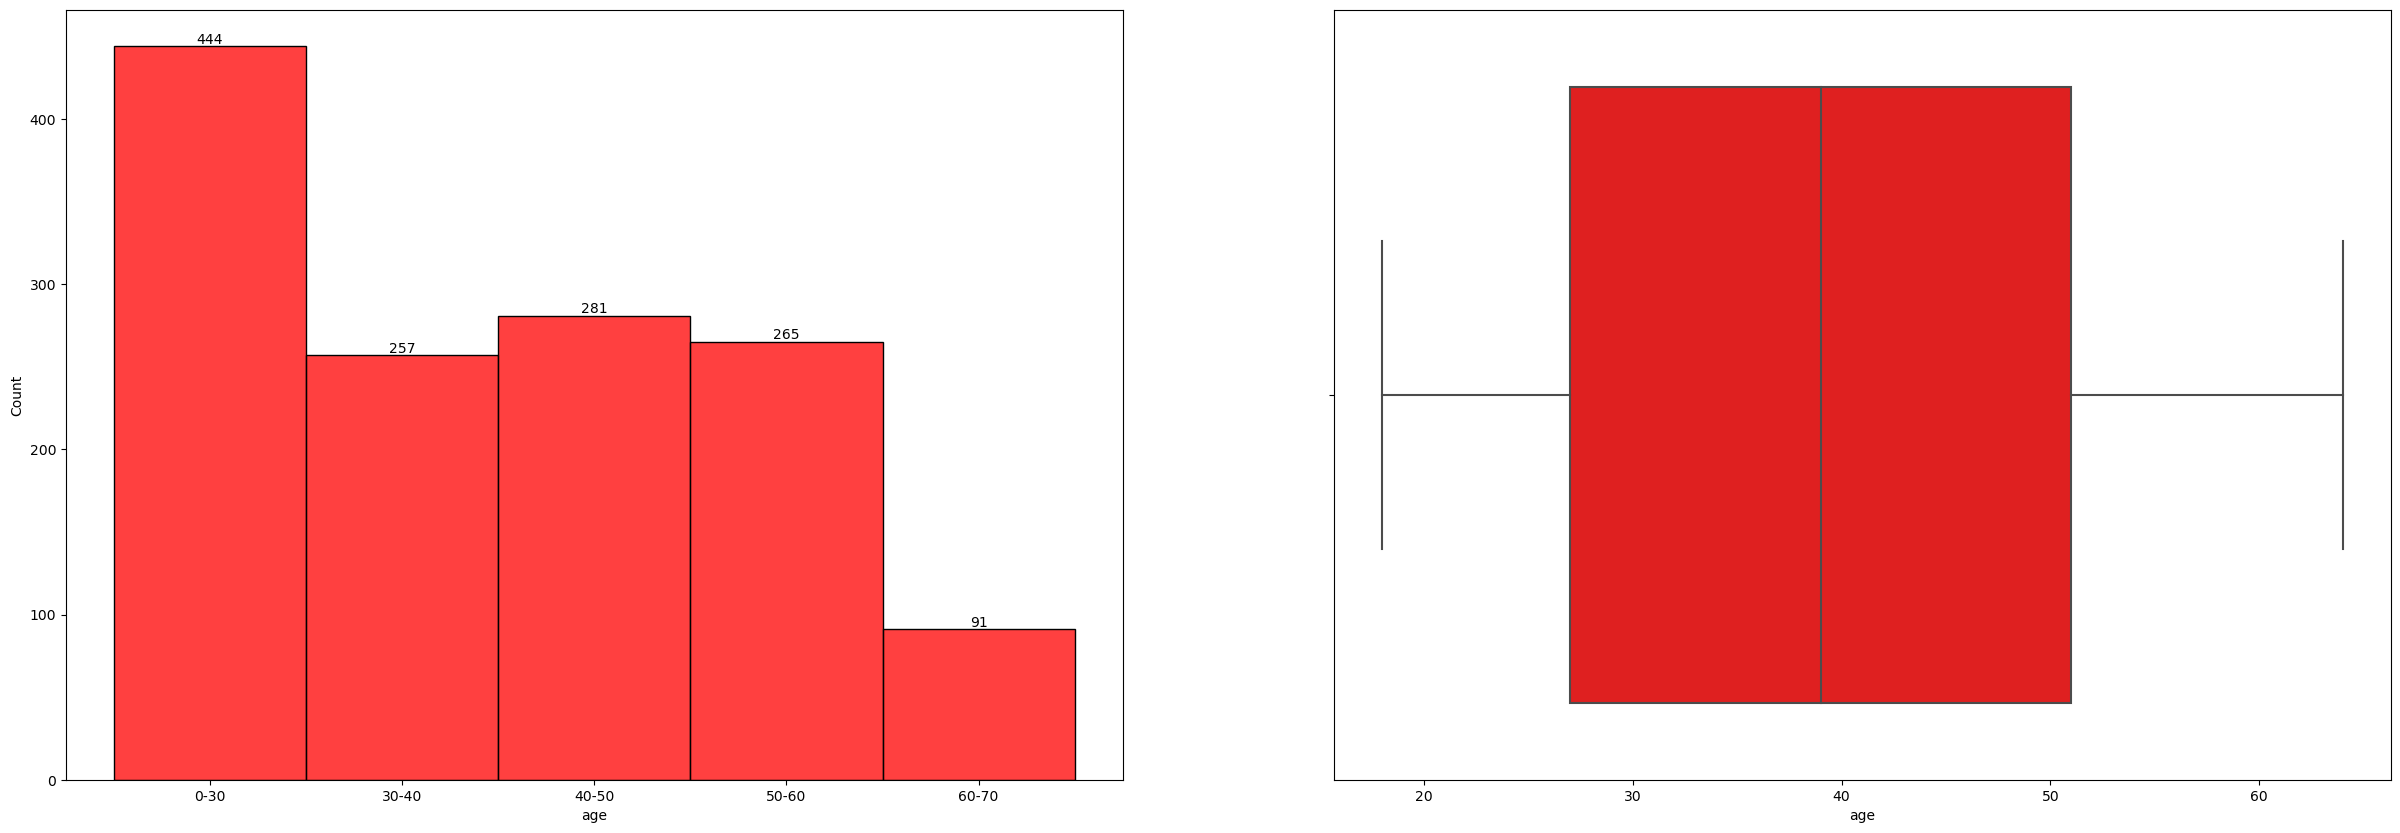

In [29]:
plt.style.use('default')
plt.rcParams.update({'text.color':'black'})

fig,ax=plt.subplots(1,2,figsize=(20,15))
bins=[0,30,40,50,60,70]
labels=["0-30","30-40","40-50","50-60","60-70"]
data=pd.cut(df['age'],bins=bins,labels=labels)
ax=sb.histplot(data=data,ax=ax[0],color='red')
for bar in ax.patches:
    count=bar.get_height()
    x = bar.get_x() + bar.get_width() /2                            
    y = bar.get_height()                                            
    ax.annotate(count, (x, y), va = "bottom", ha ="center" )   
    fig.set_figheight(10)                                                             
    fig.set_figwidth(30)


sb.boxplot(data=df,x='age',color='red')
    
plt.show()

In [ ]:
#Majority applicants belong to age group 0-30

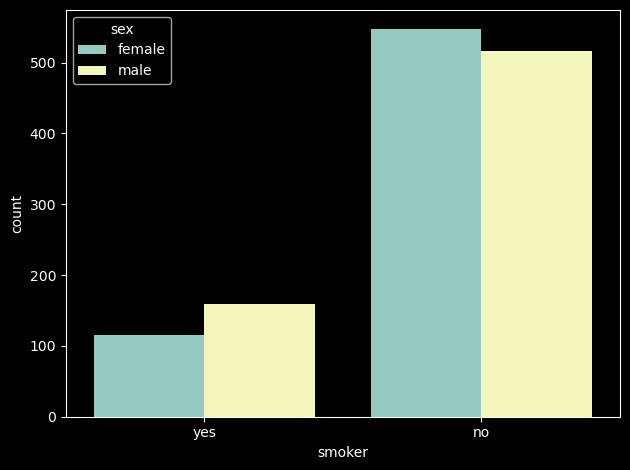

In [30]:
plt.style.use('dark_background')
plt.rcParams.update({'text.color':'white'})


sb.countplot(x=df['smoker'],hue=df['sex'])
plt.xlabel('smoker')
plt.tight_layout()

In [ ]:
#Count of Female smokers is less than male smokers